# DM TRABAJO PRACTICO N°1

Integrantes: Agustín Arenas - Nicola Petetta

Consultas:
#CONSULTAR LOS ATIPICOS DE K - Opinion del exploratorio

#Ver los otros metodos

# 1-Descargar un conjunto de datos - Crop_recommendation.csv

## BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from gap_statistic import OptimalK
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
#pd.set_option("display.max_columns", 500)
#!pip install seaborn
#!pip install gap-stat

## DATOS

In [41]:
df = pd.read_csv("Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# 2-Analisis de los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.) y método de estandarización elegido

## Estructura general del DF

In [42]:
#Descripción general del DF
df.info()
#Tamaño del data set (filas, columnas)
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


(2200, 8)

N P y K son valores enteros, temperatura, humedad, ph y lluvia son floats; y label es un string

## Buscamos valores faltantes

In [43]:
#Vemos la cantidad de valores NaN por columna
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [44]:
#Vemos la cantidad de valores Nulos por columna
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

No hay NaNs y nulos en ninguna de las columnas 

## Clases: Labels

In [45]:
#Cantidad de valores distintos
df.label.nunique()

22

In [46]:
#Nombre de cada clase unica
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Distribución de los datos respecto a las clases

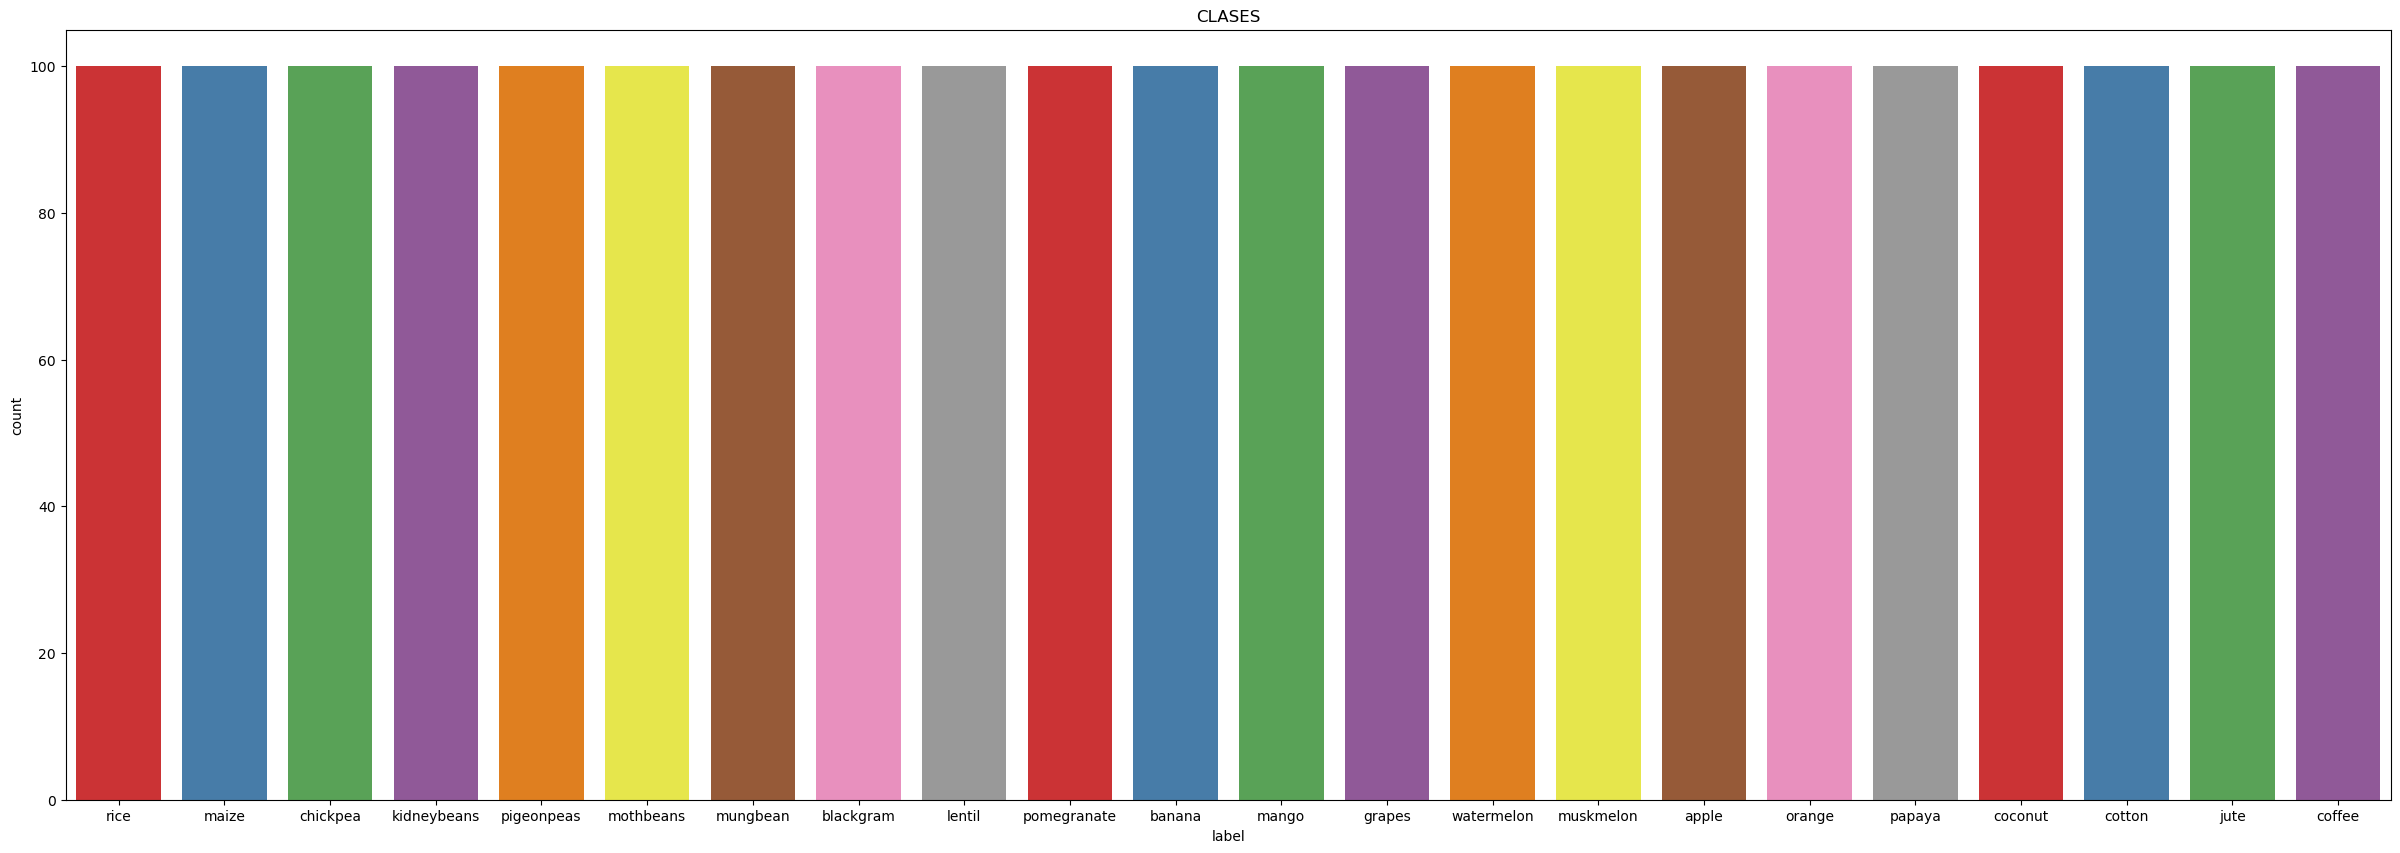

In [47]:
plt.figure(figsize=(30,10))

palette = "Set1"

sns.countplot( x='label', data=df, palette=palette, hue='label', legend=False)
plt.title('CLASES')
plt.show()

## Distribución de los datos en las columnas y valores atípicos

### Observación de valores atípicos

In [48]:
# Resumen estadistico
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


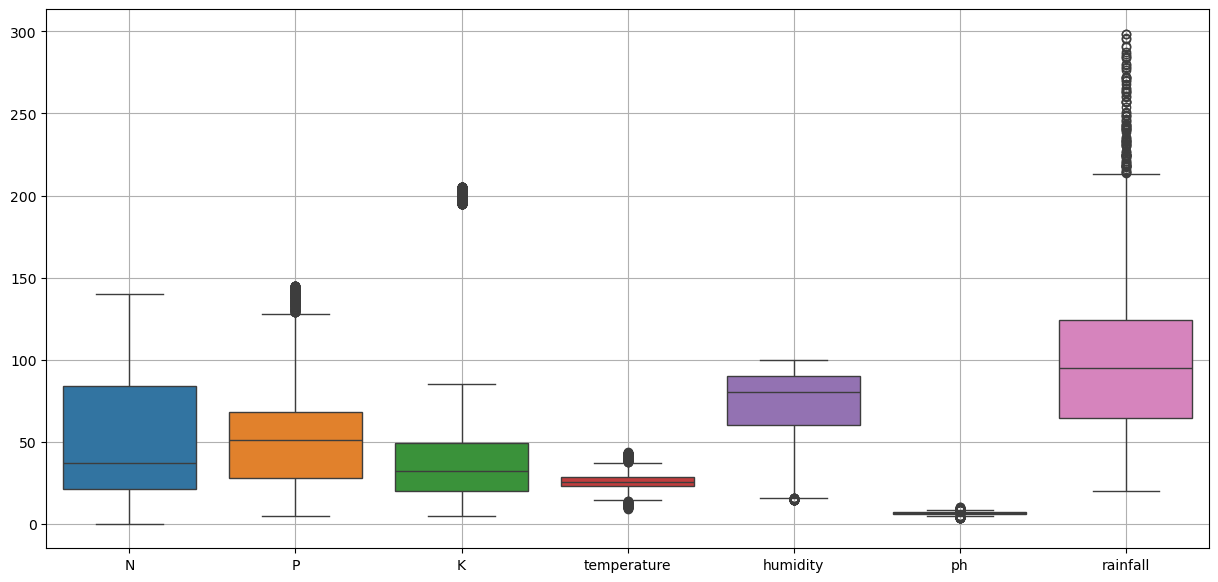

In [49]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df[df.describe().columns])
plt.grid()
plt.show()

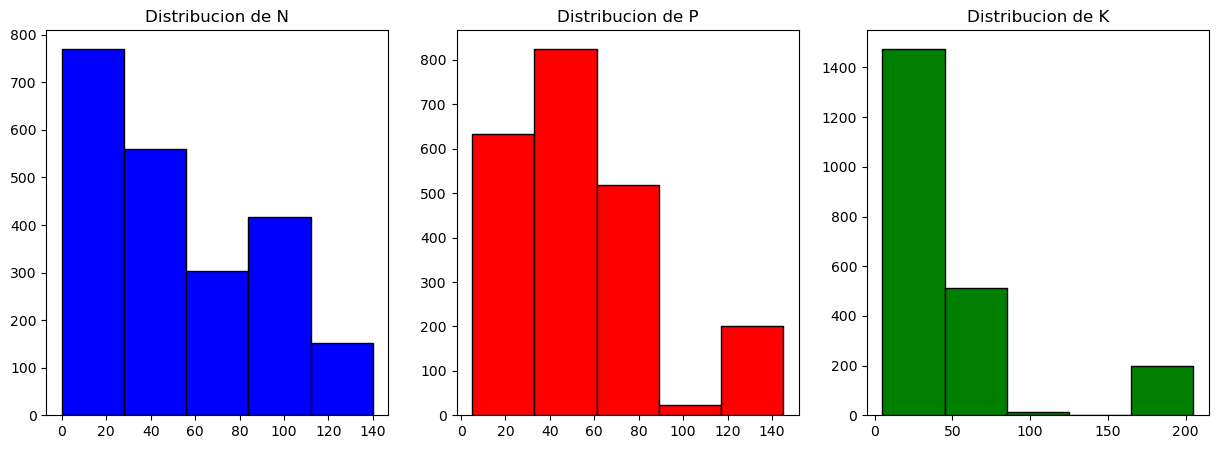

In [50]:
# Ploteo de las columnas N, P y K

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['N'], bins=5, color='blue', edgecolor='black')
plt.title('Distribucion de N')

plt.subplot(1, 3, 2)
plt.hist(df['P'], bins=5, color='red', edgecolor='black')
plt.title('Distribucion de P')

plt.subplot(1, 3, 3)
plt.hist(df['K'], bins=5, color='green', edgecolor='black')
_ = plt.title('Distribucion de K')

Viendo las distribuciones podemos apreciar que K presenta valores atipicos de los datos con valores enteros; N es asimetrica a la derecha y P es la mas distribuida normalmente

In [51]:
# Proporción de los valores atípicos de K

df[df.K > 150].K.shape[0]/df.K.shape[0]*100

9.090909090909092

Por ahora se obviara, pero sera analizado en la estandarización y en el modelo resultante

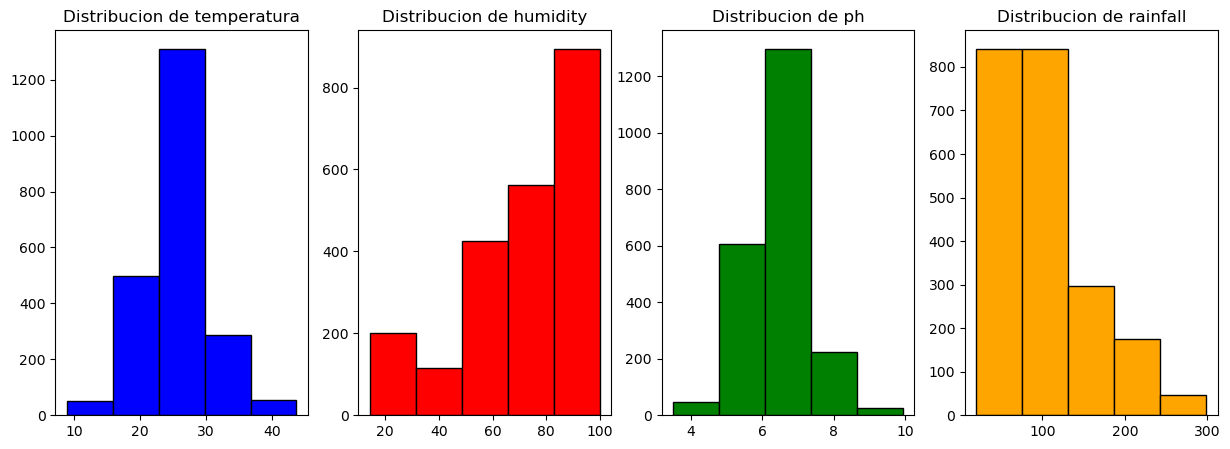

In [52]:
# Ploteo de las columnas temperature, humidity, ph y rainfall

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.hist(df['temperature'], bins=5, color='blue', edgecolor='black')
plt.title('Distribucion de temperatura')

plt.subplot(1, 4, 2)
plt.hist(df['humidity'], bins=5, color='red', edgecolor='black')
plt.title('Distribucion de humidity')

plt.subplot(1, 4, 3)
plt.hist(df['ph'], bins=5, color='green', edgecolor='black')
plt.title('Distribucion de ph')

plt.subplot(1, 4, 4)
plt.hist(df['rainfall'], bins=5, color='orange', edgecolor='black')
_ = plt.title('Distribucion de rainfall')

Temperatura y ph estan distribuidas normalmente, mientras humidity y rainfall presentan una asimetria a la izquierda y derecha respectivamente

### Vemos la matriz de correlación

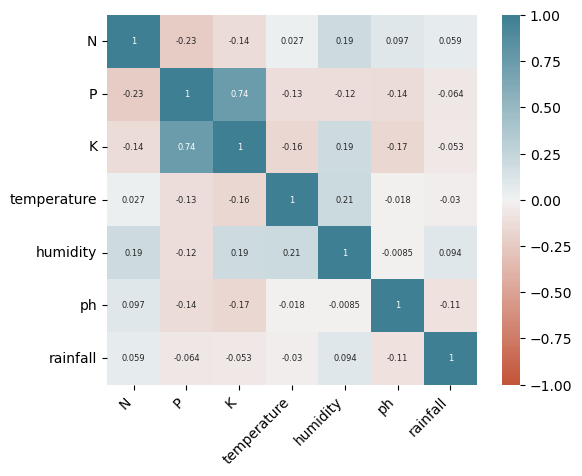

In [53]:
corr = df[df.describe().columns].corr()

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Hay una correlacion alta entre P y K, mientras una correlacion menor se da entre humidity y las variables N, K y temperature 

# 3-PCA: Analisis de componentes principales

### Estandarización

Se realiza para evitar problemas con variables con distinta naturaleza y variabilidad, ya que las variables con mayores valores de varianza le quitarán peso al resto de las variables, por lo tanto en este caso vamos a realizar la estandarización.

In [54]:
# Filtramos para quedarnos con las columnas numericas

df_sub = df[df.describe().columns]

#Normalización de acuerdo a la media y el desvio estandar

df_std = (df_sub-df_sub.mean())/df_sub.std()

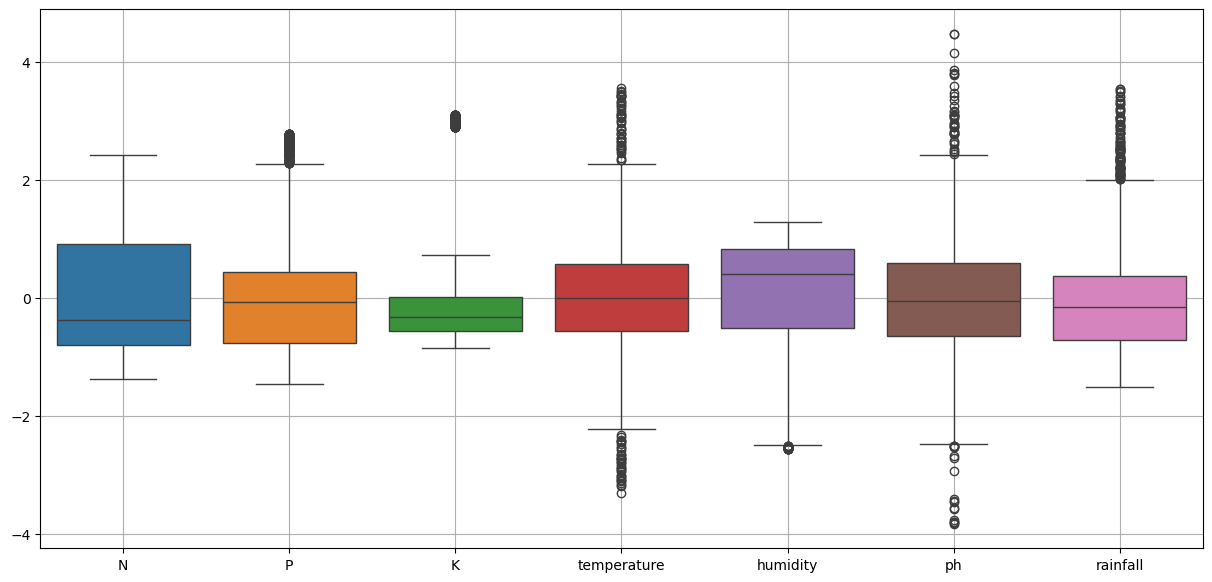

In [55]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df_std[df_std.describe().columns])
plt.grid()
plt.show()

A diferencia de los demas, K, sigue presentando valores concentrados y atípicos alejados, lo cual recordamos que representan el 9% de los datos

### Aplicación de la técnica

In [56]:
# Obtener todas las componentes principales
pca = PCA(n_components=df_sub.shape[1])

pca_features = pca.fit_transform(df_std)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns= df_sub.columns)

nuevos_nombres = {'N': 'PC1',
                  'P': 'PC2',
                  'K': 'PC3',
                  'temperature': 'PC4',
                  'humidity': 'PC5',
                  'ph': 'PC6',
                  'rainfall': 'PC7'}

pca_df.rename(columns=nuevos_nombres, inplace=True)

pca_df['label'] = df['label']

En la siguiente tabla vemos la proyección de cada valor de las columnas en cada una de las nuevas variables. 1x7(info de la clase en todas las var) x 7x1(info del vector con todas las var) = 1x1 (coordenada escalar en el vector eje)

In [57]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,-0.582737,-0.844394,1.373031,-1.613762,0.308154,-0.095975,-0.025234,rice
1,-0.474527,-0.784716,1.251893,-1.792355,1.107493,-0.532134,-0.280479,rice
2,-0.633924,-0.694365,1.179064,-1.817692,2.522690,-0.538428,-0.105943,rice
3,-1.047682,-1.087411,1.393035,-0.982177,1.448452,-0.656779,0.275209,rice
4,-0.873059,-0.658523,1.455354,-2.334481,1.959188,-0.317952,0.052728,rice
...,...,...,...,...,...,...,...,...
2195,-1.260634,-0.618222,0.711136,-1.014740,0.133200,-1.122004,0.306955,coffee
2196,-1.355275,-0.154008,0.701489,-0.197638,-0.898453,-0.771301,0.684801,coffee
2197,-1.158120,-0.640329,1.045602,-1.301545,-0.491653,-0.884927,0.203417,coffee
2198,-1.218911,0.052378,0.180814,-0.990274,-0.601252,-1.308669,0.509541,coffee


### Eigenvectors

Los valores que conforman los coeficientes de cada una de las nuevas variables.

In [58]:
pd.DataFrame(pca.components_, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], 
             index=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,-0.302191,0.643787,0.622607,-0.212428,-0.068483,-0.226943,-0.072532
X2,-0.334107,-0.034358,-0.283829,-0.359487,-0.737917,0.220657,-0.290158
X3,-0.112045,-0.109939,-0.163173,-0.248228,-0.213599,-0.548520,0.735267
X4,-0.541651,-0.046293,-0.154867,0.690826,-0.067171,-0.395700,-0.205318
X5,-0.507785,0.082331,0.033425,0.154865,0.128871,0.651881,0.518382
X6,-0.482904,-0.376847,-0.028967,-0.500418,0.547871,-0.125712,-0.239930
X7,-0.008473,-0.649104,0.692268,0.111282,-0.289624,0.040028,0.038577


### Selección de la cantidad de Componentes principales

In [59]:
# Creamos función para acumular la varianza

def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

Eigenvalores y varianzas

In [60]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_, 
                        'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.931218,0.275888,0.275888
1,1.293910,0.184844,0.460733
2,1.076509,0.153787,0.614520
3,1.022891,0.146127,0.760647
4,0.805928,0.115133,0.875780
5,0.676562,0.096652,0.972431
6,0.192981,0.027569,1.000000


Vemos gráficamente la variancia acumulada:

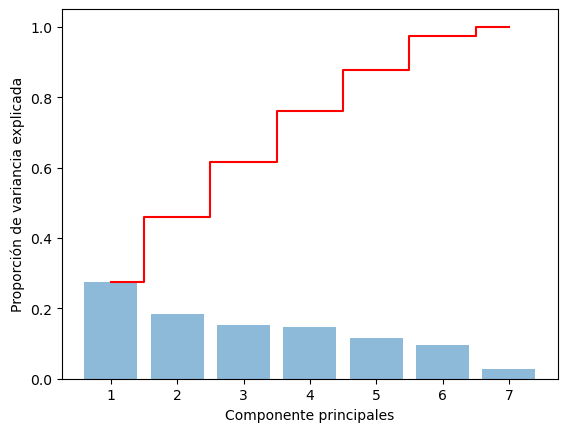

In [61]:
plt.bar(range(1,8), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,8), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

Gráficamos la proporción de variancia acumulada:

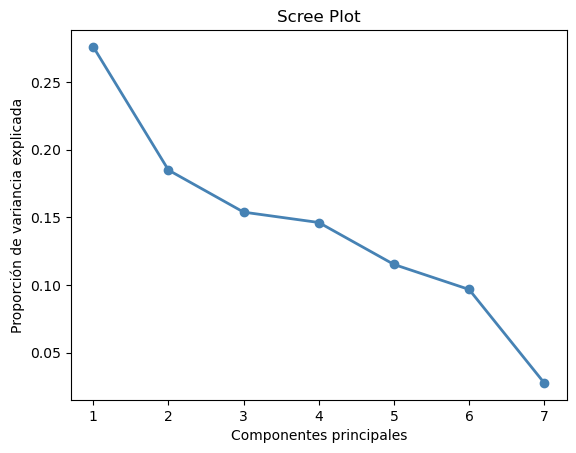

In [62]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

**Criterios de selección:**
* Proporción de variancia acumulada (~75% -80%)​
* Criterio de Kaiser (eigenvalues > 1)​
* Gráfico del codo (Scree)

En este caso se tomo el criterio del "Gráfico del codo", se tomo hasta la 4° componente en donde se da el punto de inflexión de la proporción de variancia.
Comparandolo con los otros criterios disponible, se ve un cumplimiento en ambos con las componentes seleccionadas

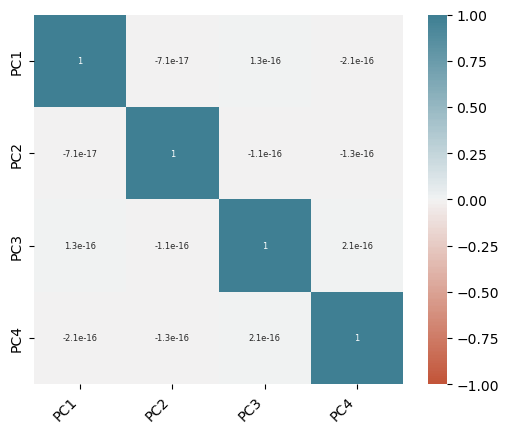

In [63]:
# Matriz de correlación para las cuatro componentes seleccionadas

corr = pca_df[['PC1', 'PC2', 'PC3', 'PC4']].corr()


ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Se observa valores muy cercanos a 0 entre las componentes distintas, por lo que no hubo un error durante la aplicación de PCA

Gráficamos las componentes en un grafico 2D:
* Las componentes seleccionadas son 4 pero a modo ilustrativo se graficaran las dos primeras

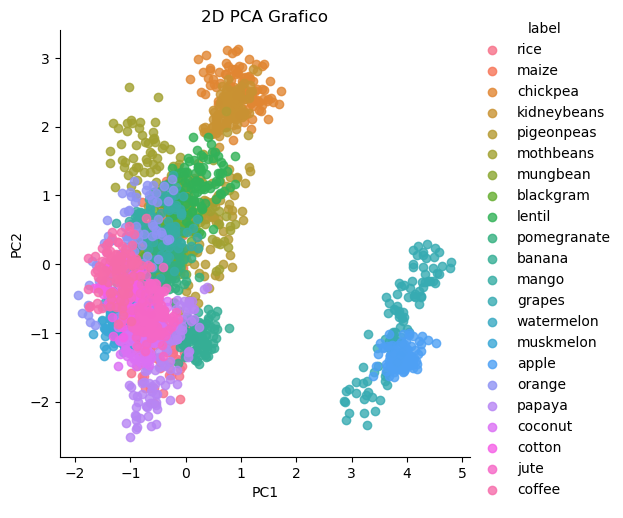

In [64]:
sns.lmplot(x='PC1', y='PC2', data=pca_df, hue='label', fit_reg=False, legend=True)

plt.title('2D PCA Grafico')

plt.show()

Gráficamos las componentes en un grafico 3D:
* Las componentes seleccionadas son 4 pero a modo ilustrativo se graficaran las tres primeras

In [65]:

fig = px.scatter(pca_features, x=0, y=1, color = pca_df["label"],  labels={'color': 'label'} )
fig.update_layout(title = "Biplot",width = 1200,height = 600)
fig.show()
fig = px.scatter_3d(pca_features, x=0, y=1, z=2,
              color=pca_df["label"],  labels={'color': 'label'})
fig.show()

## K-means

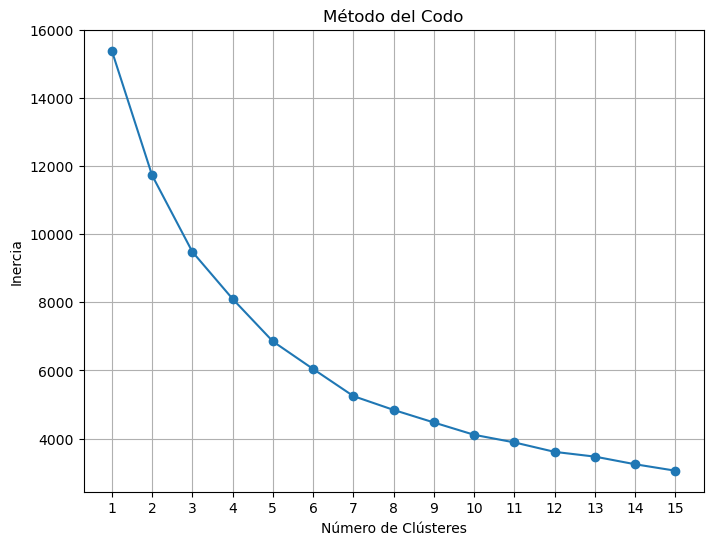

In [66]:
inercia = []
kmax = 16
for k in range(1, kmax):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_std)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, kmax), inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.xticks(np.arange(1, kmax))
plt.grid(True)
plt.show()

In [67]:
kmeans = KMeans(n_clusters=13, n_init = 10)

#Entrenamos el modelo
kmeans.fit(df_std)

KMeans(n_clusters=13, n_init=10)

In [68]:
kmeans_df = df_std.copy()
# El metodo labels_ nos da a que cluster corresponde cada observacion
kmeans_df['Cluster_KMeans'] = kmeans.labels_
kmeans_df

,N,P,K,temperature,humidity,ph,rainfall,Cluster_KMeans
0,1.068554,-0.344472,-0.101664,-0.935374,0.472559,0.043292,1.809949,5
1,0.933117,0.140584,-0.141153,-0.759473,0.396961,0.734706,2.241548,5
2,0.255928,0.049636,-0.081920,-0.515781,0.486843,1.771108,2.920402,5
3,0.635154,-0.556684,-0.160897,0.172768,0.389717,0.660158,2.536471,5
4,0.743504,-0.344472,-0.121409,-1.083401,0.454688,1.497527,2.897714,5
...,...,...,...,...,...,...,...,...
2195,1.529043,-0.587000,-0.318850,0.228762,-0.227657,0.401303,1.352129,5
2196,1.312342,-1.163004,-0.417571,0.355639,-0.666796,-0.494300,0.445081,4
2197,1.827006,-0.617316,-0.358338,-0.293152,-0.191192,-0.138089,1.271129,5
2198,1.799918,-0.647632,-0.279362,0.129583,-0.869320,0.373819,0.431447,4


In [69]:
# Valores normalizados

kmeans_df.groupby('Cluster_KMeans').mean()

,N,P,K,temperature,humidity,ph,rainfall
Cluster_KMeans,,,,,,,
0,-0.109343,-0.045906,-0.102562,2.384799,0.940115,0.489807,0.831959
1,-0.671172,0.112474,-0.508046,0.391363,0.120332,0.307558,-0.866044
2,-0.773670,2.425652,2.998166,-0.469215,0.701700,-0.635297,-0.224358
3,1.310298,0.832132,0.028721,0.354970,0.413893,-0.597177,0.005250
4,1.299454,-0.280907,-0.516530,-0.389490,-0.081374,0.208907,-0.196947
5,0.818969,-0.278695,-0.190768,-0.183609,0.279181,0.202232,1.753945
6,-0.596875,0.203047,-0.560683,0.636814,-0.526899,1.691114,-0.704585
7,-0.274703,0.443424,0.625544,-1.329845,-2.451243,1.206943,-0.428622
8,-0.818748,-0.319266,-0.455506,0.997794,-0.983697,-1.335762,-0.073343


In [70]:
# Caracteristicas normalizadas que tendria el centroide de ese cluster

kmeans.cluster_centers_

array([[-0.1093434 , -0.04590577, -0.10256185,  2.38479948,  0.9401148 ,
         0.48980706,  0.83195925],
       [-0.67117176,  0.11247447, -0.50804576,  0.39136343,  0.12033194,
         0.30755828, -0.86604369],
       [-0.77366958,  2.42565201,  2.99816611, -0.46921466,  0.70170042,
        -0.63529696, -0.22435795],
       [ 1.31029804,  0.83213154,  0.02872146,  0.35496995,  0.41389251,
        -0.59717674,  0.00525009],
       [ 1.29945395, -0.28090663, -0.51653024, -0.3894899 , -0.08137399,
         0.20890712, -0.19694711],
       [ 0.81896921, -0.27869454, -0.19076803, -0.18360878,  0.27918128,
         0.20223213,  1.75394535],
       [-0.59687516,  0.20304672, -0.56068259,  0.63681376, -0.52689872,
         1.69111359, -0.70458506],
       [-0.27470272,  0.44342443,  0.62554358, -1.3298454 , -2.45124294,
         1.20694292, -0.42862201],
       [-0.81874752, -0.31926587, -0.45550606,  0.99779438, -0.98369654,
        -1.33576238, -0.0733432 ],
       [-0.86627029, -1.0752

In [71]:
# Distribución de los datos

datakm = kmeans_df['Cluster_KMeans'].value_counts().sort_index()
datakm

Cluster_KMeans
0      66
1     261
2     200
3     106
4     248
5     271
6     149
7      95
8     178
9     161
10    200
11    137
12    128
Name: count, dtype: int64

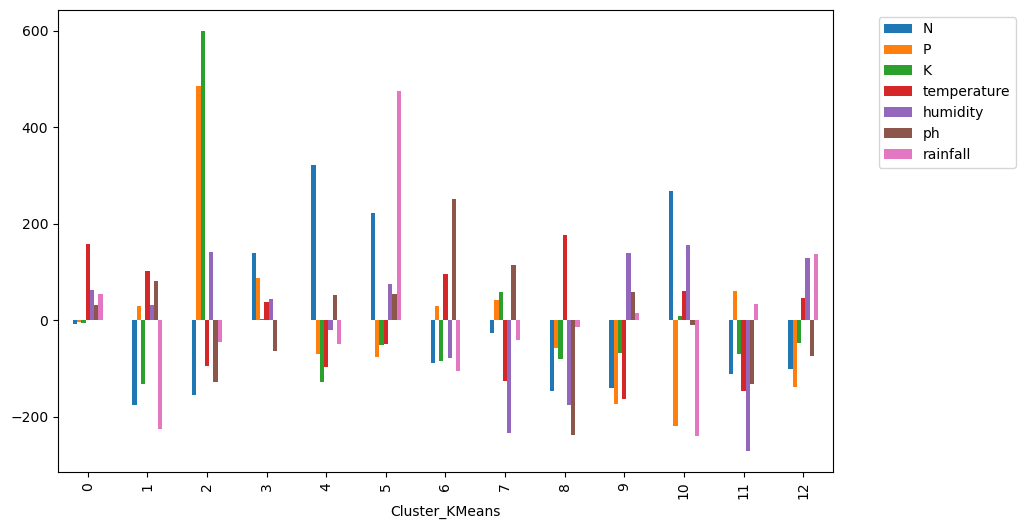

In [73]:
kmeans_df.groupby('Cluster_KMeans').sum().plot(kind='bar', figsize=(10, 6))
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Metrica GAP

In [78]:
# Determinación de K optimo

gs_obj = OptimalK(n_jobs=1, n_iter= 10)
n_clusters = gs_obj(df_std, n_refs=50, cluster_array=np.arange(1, kmax))
print('Optimal number of clusters: ', n_clusters)

Optimal number of clusters:  15


## Clustering Jerarquico